<a href="https://colab.research.google.com/github/imnbid/SystemIdentification/blob/main/%D9%8BHW1_Implementations/Q2Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

for generating data, we should define t and f firstly:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# پارامترها
N = 200
f = 0.05   # فرکانس
t = np.linspace(0, 10, N)

# ورودی‌ها
u1 = np.exp(-t)
u2 = np.sin(2*np.pi*f*t)

# سیستم واقعی
sigma_var = 0.05 + 0.2*t**2/N  # واریانس نویز متغیر
e = np.random.normal(0, np.sqrt(sigma_var))

y = 1.5*u1 - 0.8*u2 + e

# ماتریس رگرسور
X = np.column_stack([u1, u2])

now we should choose needed number of regressors, as the system is visible to us the needed regresors are two. we're gonna use weighted LS first.

In [2]:
W = np.diag(1.0 / sigma_var)
theta_wls = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
y_pred_wls = X @ theta_wls
rmse_wls = np.sqrt(mean_squared_error(y, y_pred_wls))

print("WLS θ:", theta_wls)
print("RMSE WLS:", rmse_wls)

WLS θ: [ 1.51432629 -0.80838394]
RMSE WLS: 0.2934775356496872


ridge regression

In [3]:
lambda_ridge = 0.1
ridge_model = Ridge(alpha=lambda_ridge, fit_intercept=False)
ridge_model.fit(X, y)
theta_ridge = ridge_model.coef_
y_pred_ridge = ridge_model.predict(X)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))

print("Ridge θ:", theta_ridge)
print("RMSE Ridge:", rmse_ridge)

Ridge θ: [ 1.502775   -0.81285156]
RMSE Ridge: 0.29346711590116425


condition number for ridge regression:

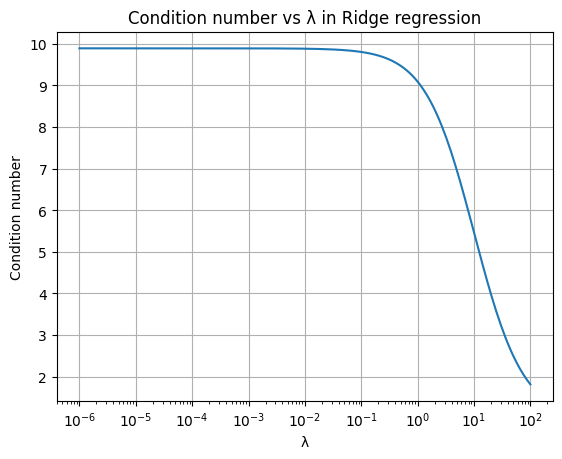

In [4]:
cond_values = []
lambdas = np.logspace(-6, 2, 200)  # از خیلی کوچک تا بزرگ

PhiTPhi = X.T @ X
for lam in lambdas:
    M = PhiTPhi + lam*np.eye(X.shape[1])
    cond_values.append(np.linalg.cond(M))

plt.semilogx(lambdas, cond_values)
plt.xlabel("λ")
plt.ylabel("Condition number")
plt.title("Condition number vs λ in Ridge regression")
plt.grid(True)
plt.show()

so when condition number is small the matrix is actually close to the XX^T, but with incrising lambda the conditioning number gets small and smaller which means more stability but it contains bias.

OLSQ (orthogonal least squeres)

In [5]:
def orthogonal_least_squares(X, y):
    Q, R = np.linalg.qr(X)
    g = np.linalg.inv(R) @ (Q.T @ y)
    return g

theta_olsq = orthogonal_least_squares(X, y)
y_pred_olsq = X @ theta_olsq
rmse_olsq = np.sqrt(mean_squared_error(y, y_pred_olsq))

print("OLSQ θ:", theta_olsq)
print("RMSE OLSQ:", rmse_olsq)

OLSQ θ: [ 1.51806404 -0.81454268]
RMSE OLSQ: 0.29344637126741546


this algorythm expands matrix X to an orthogonal set And the selection of regressors works based on their contribution to reducing the prediction error.

Condition number plot shows that in Ridge Regression, by increasing lambda, the condition number decreases, leading to a more stable solution and reduced sensitivity to noise. However, if lambda is too large, the coefficients become overly small (high bias), so an optimal lambda must be found to balance stability and accuracy.